In [1]:
from matplotlib import pyplot as plt
import numpy as np

import matplotlib.path as mpath
import matplotlib.patches as mpatches

Path = mpath.Path

# Define coordinate transformation

We will call $(x,y)$ the original coordinates and $p=(p_1, p_2)$ the pixel coordinates. The canvas size in pixels is $800\times 800$, with the origin in the top left corner, the $p_1$ coordinate increasing from left to right and the $p_2$ coordinate increasing from top to bottom. The size of the box in original coordinates is $8x8$, with the coordinate ranges being $[-4,4]$ for $x$ and $[-3.5,4.5]$ for $y$ (so the top left corner corresponds to $(x,y)=(-4,4.5)$). The $x$ coordinate increasing left to right and the $y$ coordinate increasing bottom to top.

From the definitions above, we immediately read off the coordinate transformation as a translation combined with a reflection wrt the x axis and a scaling. In formulae:

In [2]:
scale = 800/8
xlims = (-4,4)
ylims = (-3.5, 4.5)
top_left_xy = (xlims[0], ylims[1])

def p1(x):
    return (x - top_left_xy[0]) * scale
def p2(y):
    return -(y - top_left_xy[1]) * scale
def p(xy):
    return np.array((p1(xy[0]), p2(xy[1])))

def flip(xy):
    return np.array((xy[0],1-xy[1]))

# Compute expression of parabola as Bézier curve
Display the curve as both a direct mpl plot from the original expression and a quadratic Bézier curve, to make sure we have the correct values for the start, stop and control points.

[array([-0.17980737,  1.44951843]), array([0.        , 0.55048157]), array([0.17980737, 1.44951843])]


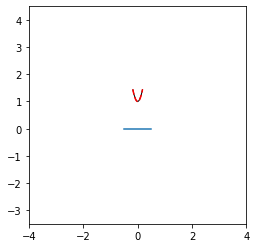

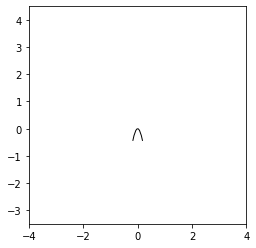

In [3]:
def c(γ):
    return (γ*np.sqrt(1+γ**2)+np.arcsinh(γ))/(2*γ)

def χ(t, T=1, γ=5, τ=1):
    x = (T/c(γ))*(t-0.5)
    y = τ + (T/c(γ))*γ*(t-0.5)**2
    return np.vstack((x,y)).T


def start_point(T=1, γ=5, τ=1):
    return np.array([-T/(2*c(γ)), τ+γ*T/(4*c(γ))])

def end_point(T=1, γ=5, τ=1):
    return np.array([T/(2*c(γ)), τ+γ*T/(4*c(γ))])

def control_point(T=1, γ=5, τ=1):
    return np.array([0, τ-γ*T/(4*c(γ))])


trange = np.linspace(0,1,100)
points = χ(trange)


fig, ax = plt.subplots()
ax.plot(points[:,0], points[:,1], linestyle='--', color='r')
print([start_point(), control_point(), end_point()])

ax.plot(np.linspace(-0.5, 0.5, 100), np.zeros(100))

# unflipped
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_aspect('equal')
ax.add_patch(mpatches.PathPatch(
    Path([start_point(), control_point(), end_point()], [Path.MOVETO, Path.CURVE3, Path.CURVE3]), fc="none", transform=ax.transData))

# flipped
fig, ax = plt.subplots()
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_aspect('equal')
ax.add_patch(mpatches.PathPatch(
    Path([flip(start_point()), flip(control_point()), flip(end_point())], [Path.MOVETO, Path.CURVE3, Path.CURVE3]), fc="none", transform=ax.transData))

## Display parabola in transformed coordinates
This should look exactly as above, only in the new pixel-based coordinate system.

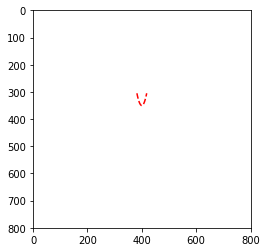

In [4]:
fig, ax = plt.subplots()
ax.set_xlim([0,800])
ax.set_ylim([0,800])
ax.invert_yaxis() # we need to invert the y axis to mimic the convention used by Fabric
ax.set_aspect('equal')

ax.plot(p1(points[:,0]), p2(points[:,1]), linestyle='--', color='r')

# Coordinates for all models, flipped and unflipped version

In [5]:
base_start = (-0.5, 0)
base_end = (0.5, 0)
horizontal_start = (-1.5, 1)
horizontal_end = (1.5, 1)
vertical_start = (0, 1)
vertical_end = (0, 2)
point = (0, 1)

In [6]:
print(
"------Unflipped base-------\n\
Start: {}\n\
End: {}\n\
\n------Flipped base-------\n\
Start: {}\n\
End: {}\n\
\n-----Unflipped horizontal-------\n\
Start: {}\n\
End: {}\n\
\n------Flipped horizontal-------\n\
Start: {}\n\
End: {}\n\
\n-----Unflipped vertical-------\n\
Start: {}\n\
End: {}\n\
\n------Flipped vertical-------\n\
Start: {}\n\
End: {}\n\
\n------Unflipped parabola-------\n\
Start: {}\n\
Control: {}\n\
End: {}\n\
\n------Flipped parabola------\n\
Start: {}\n\
Control: {}\n\
End: {}\n\
\n------Unflipped point-------\n\
Location: {}\n\
\n------Flipped point-------\n\
Location: {}\n".format(
    p(base_start),
    p(base_end),
    p(flip(base_start)),
    p(flip(base_end)),
    p(horizontal_start),
    p(horizontal_end),
    p(flip(horizontal_start)),
    p(flip(horizontal_end)),  
    p(vertical_start),
    p(vertical_end),
    p(flip(vertical_start)),
    p(flip(vertical_end)),
    p(start_point()),
    p(control_point()),
    p(end_point()),
    p(flip(start_point())),
    p(flip(control_point())),
    p(flip(end_point())),
    p(point),
    p(flip(point))
    ))

------Unflipped base-------
Start: [350. 450.]
End: [450. 450.]

------Flipped base-------
Start: [350. 350.]
End: [450. 350.]

-----Unflipped horizontal-------
Start: [250. 350.]
End: [550. 350.]

------Flipped horizontal-------
Start: [250. 450.]
End: [550. 450.]

-----Unflipped vertical-------
Start: [400. 350.]
End: [400. 250.]

------Flipped vertical-------
Start: [400. 450.]
End: [400. 550.]

------Unflipped parabola-------
Start: [382.01926263 305.04815658]
Control: [400.         394.95184342]
End: [417.98073737 305.04815658]

------Flipped parabola------
Start: [382.01926263 494.95184342]
Control: [400.         405.04815658]
End: [417.98073737 494.95184342]

------Unflipped point-------
Location: [400. 350.]

------Flipped point-------
Location: [400. 450.]

